# Python Homework 4

**Release date:** Friday, Dec 1<br>
**Due date:** Wednesday, Dec 13, at midnight (11:59pm) via <font color="blue">Gradescope</font>

**Instruction:** Please upload your jupyter notebook on <font color="blue">Gradescope</font> with filename __PythonHW4_YOURPERMNUMBER.ipynb__.


__Background__: Let $(B_t)_{t\geq 0}$ denote a standard Brownian motion. A so-called __stochastic differential equation (SDE)__ is an equation of the form

\begin{equation}
    dX_t = b(X_t) \, dt + \sigma(X_t) \, dB_t, \quad X_0 = x,
\end{equation}
  
with starting value $x \in \mathbb{R}$ and two (deterministic) functions $b: \mathbb{R} \rightarrow \mathbb{R}$, $\sigma: \mathbb{R} \rightarrow \mathbb{R}$ which are given.
  
The "differential form" in above SDE is just a shorthand notation. More precisely, solving the SDE means to find a stochastic process $(X_t)_{t \geq 0}$ which satisfies the __integral equation__

\begin{equation}
    X_t = x + \int_0^t b(X_s) \, ds + \int_0^t \sigma(X_s) \, dB_s \quad (t \geq 0).
\end{equation}

Note that the process $(X_t)_{t \geq 0}$ appears on both sides of this equation. The first term

\begin{equation}
    \int_0^t b(X_s) \, ds \quad (t \geq 0)
\end{equation}

can be thought of as just integrating the (random) function $s \mapsto b(X_s)$ over the interval $[0,t]$. However, the second term

\begin{equation}
    \int_0^t \sigma(X_s) \, dB_s \quad (t \geq 0)
\end{equation}

is called a __stochastic integral__ of the (random) function $s \mapsto \sigma(X_s)$ with respect to Brownian motion $(B_s)_{0 \leq s \leq t}$ over the interval $[0,t]$. Of course, one has to make sense of this and we will discuss this a bit in Chapter 5 "Introduction to Stochastic Calculus" in Week 10.


__Numerical Approximation of an SDE (Euler-Maruyama Method):__

The differential form of a stochastic differential equation lends itself to an intuitive method for simulating the solution process $(X_t)_{t\geq 0}$. Given the SDE

\begin{equation}
    dX_t = b(X_t) \, dt + \sigma(X_t) \, dB_t, \quad X_0 = x,
\end{equation}

the *Euler-Maruyama* method generates a discrete sequence $X_0, X_1, \ldots, X_n$, which approximates the process $(X_t)_{0 \leq t\leq T}$ on an interval $[0,T]$.

The idea is to partition the interval $[0,T]$ into $n$ equally spaced points

\begin{equation}
    0 = t_0 < t_1 < t_2 < \cdots < t_{n-1} < t_n = T
\end{equation}

where $t_i = i \cdot T/n$ for $i=0,1,\ldots,n$, and to *discretize* the SDE via

\begin{equation}
    X_{t_0} = x, \quad X_{t_{i+1}} = X_{t_i} + b(X_{t_i}) \cdot (t_{i+1} - t_{i}) + \sigma(X_{t_i}) \cdot (B_{t_{i+1}} - B_{t_{i}}) \quad (i=0,1,\ldots,n-1).
\end{equation}

Note that in the SDE the differential $dX_{t_{i+1}}$ is approximated by $X_{t_{i+1}}-X_{t_i}$, $dt_{i+1}$ is approximated by $t_{i+1} - t_i$ and the stochastic differential $dB_{t_{i+1}}$ is approximated by the increment of the Brownian motion $B_{t_{i+1}} - B_{t_{i}}$.

Above scheme defines recursively a sequence $X_{t_0}, X_{t_1},\ldots,X_{t_n}$ which gives a *discretized approximate sample path* for $(X_t)_{0 \leq t\leq T}$. If $n$ is very large the approximation will be sufficiently good.


Load some packages:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 (20 Points)

1. Simulate the solution $(X_t)_{0 \leq t \leq T}$ of the SDE

\begin{equation}
    dX_t = -r \cdot (X_t - \mu) \, dt + \sigma \, dB_t \quad (0 \leq t \leq T), \quad X_0 = 1,
\end{equation}

by using the Euler-Maruyama method. Choose $r=0.2$, $\mu=-0.5$, $\sigma = 0.2$, $T=10$ and $n = 1000$.

In [ ]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!
np.random.seed(1014)
# SDE parameters
r = 0.2
mu = -0.5
sigma = 0.2
T = 10
n = 1000
X_0 = 1

def simulate_SDE(n):
    dt = T / n
    t = np.linspace(0, T, n+1)
    X = np.zeros(n+1)
    X[0] = X_0
    for i in range(n):
        dB = np.random.normal(0, np.sqrt(dt))
        X[i+1] = X[i] - r * (X[i] - mu) * dt + sigma * dB
    return X

2. Use your code from 1.) to plot a discretized approximate sample path (realization) of $(X_t)_{0 \leq t \leq 10}$ on $[0,10]$.

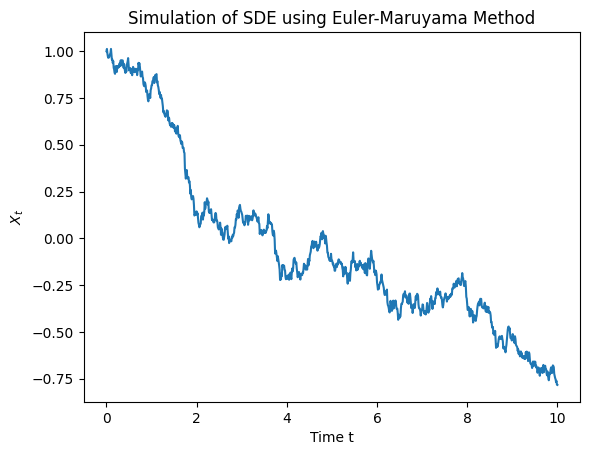

In [ ]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!
X = simulate_SDE(n)
t = np.linspace(0, 10, 1000+1)
# Plot the discretized approximate sample path
plt.plot(t,X)
plt.title("Simulation of SDE using Euler-Maruyama Method")
plt.xlabel("Time t")
plt.ylabel("$X_t$")
plt.show()

3. Approximate the mean $\mathbb{E}[X_{10}]$ of $X_{10}$ by running 10000 simulations with your code from 1.)

In [ ]:
num = 10000

# Calculate X_10
final_values = np.array([simulate_SDE(n)[-1] for _ in range(num)])

# Calculate the mean
mean_X_10 = np.mean(final_values)
mean_X_10

-0.29720609228408146